# Axel (Titouan) Magret, Gurleen Virk,  Victor Hsu
# Final Team Project: Machine Learning for E-Commerce User Predictions 
# AAI 540 Group 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import gzip
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Inspect file structure without loading entire files
def inspect_file_structure(filepath, nrows=5):
    print(f"Inspecting: {filepath}")
    
    # Read just first few rows
    if filepath.endswith('.gz'):
        df_sample = pd.read_csv(filepath, compression='gzip', nrows=nrows)
    else:
        df_sample = pd.read_csv(filepath, nrows=nrows)
    
    print(f"\nColumns: {df_sample.columns.tolist()}")
    print(f"\nData types:\n{df_sample.dtypes}")
    print(f"\nFirst {nrows} rows:")
    print(df_sample)
    print(f"\nMemory usage: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB for {nrows} rows")
    
    return df_sample

In [4]:
inspect_file_structure('2019-Oct.csv.gz', nrows=10)

Inspecting: 2019-Oct.csv.gz

Columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

Data types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

First 10 rows:
                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   
5  2019-10-01 00:00:05 UTC       view     1480613  2053013561092866779   
6  2019-10-01 00:00:08 UTC       view    17300353  20530

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [14]:
inspect_file_structure('2019-Nov.csv.gz', nrows=10)

Inspecting: 2019-Nov.csv.gz

Columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

Data types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

First 10 rows:
                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
5  2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   
6  2019-11-01 00:00:01 UTC       view     1306421  20530

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [5]:
# Create manageable random sample

def create_stratified_sample(filepath, sample_fraction=0.01, random_state=42):
    print(f"\nCreating {sample_fraction*100}% sample from {filepath}...")
    
    # First pass: count total rows
    print("Counting total rows...")
    if filepath.endswith('.gz'):
        total_rows = sum(1 for _ in gzip.open(filepath, 'rt')) - 1  # -1 for header
    else:
        total_rows = sum(1 for _ in open(filepath)) - 1
    
    print(f"Total rows: {total_rows:,}")
    
    # Calculate skip probability
    skip_prob = 1 - sample_fraction
    
    # Read with random sampling
    if filepath.endswith('.gz'):
        df_sample = pd.read_csv(
            filepath,
            compression='gzip',
            skiprows=lambda i: i > 0 and np.random.random() > sample_fraction
        )
    else:
        df_sample = pd.read_csv(
            filepath,
            skiprows=lambda i: i > 0 and np.random.random() > sample_fraction
        )
    
    print(f"Sample size: {len(df_sample):,} rows ({len(df_sample)/total_rows*100:.2f}%)")
    print(f"Sample memory: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df_sample, total_rows

In [6]:
# Analyze large file in chunks to get statistics without loading all data
def analyze_in_chunks(filepath, chunksize=100000):
    print(f"\nAnalyzing {filepath} in chunks of {chunksize:,} rows...")
    
    # Initialize aggregators
    event_type_counts = {}
    total_rows = 0
    price_sum = 0
    price_count = 0
    missing_counts = {}
    unique_users = set()
    unique_products = set()
    
    # Process in chunks
    if filepath.endswith('.gz'):
        reader = pd.read_csv(filepath, compression='gzip', chunksize=chunksize)
    else:
        reader = pd.read_csv(filepath, chunksize=chunksize)
    
    for i, chunk in enumerate(reader):
        total_rows += len(chunk)
        
        # Event type distribution
        for event_type, count in chunk['event_type'].value_counts().items():
            event_type_counts[event_type] = event_type_counts.get(event_type, 0) + count
        
        # Price statistics
        price_sum += chunk['price'].sum()
        price_count += chunk['price'].notna().sum()
        
        # Missing values
        for col in chunk.columns:
            missing_counts[col] = missing_counts.get(col, 0) + chunk[col].isna().sum()
        
        # Track unique values (sample only to save memory)
        if i < 10:  # Only track first 10 chunks to avoid memory issues
            unique_users.update(chunk['user_id'].dropna().unique())
            unique_products.update(chunk['product_id'].dropna().unique())
        
        if (i + 1) % 10 == 0:
            print(f"Processed {total_rows:,} rows...")
    
    # Compile results
    results = {
        'total_rows': total_rows,
        'event_type_counts': event_type_counts,
        'avg_price': price_sum / price_count if price_count > 0 else 0,
        'missing_counts': missing_counts,
        'unique_users_sample': len(unique_users),
        'unique_products_sample': len(unique_products)
    }
    
    return results

In [7]:
# Function for chunk analysis results
def print_chunk_analysis(results):
    print("\n" + "="*80)
    print("DATASET SUMMARY")
    print("="*80)
    
    print(f"\nTotal Rows: {results['total_rows']:,}")
    
    print(f"\nEvent Type Distribution:")
    for event_type, count in sorted(results['event_type_counts'].items(), key=lambda x: -x[1]):
        pct = count / results['total_rows'] * 100
        print(f"  {event_type:20s}: {count:12,} ({pct:5.2f}%)")
    
    print(f"\nAverage Price: ${results['avg_price']:.2f}")
    
    print(f"\nMissing Values:")
    for col, count in sorted(results['missing_counts'].items(), key=lambda x: -x[1]):
        pct = count / results['total_rows'] * 100
        print(f"  {col:20s}: {count:12,} ({pct:5.2f}%)")
    
    print(f"\nUnique Values (from sample):")
    print(f"  Users: ~{results['unique_users_sample']:,}")
    print(f"  Products: ~{results['unique_products_sample']:,}")

In [9]:
# Function for Exploratory Data Analysis on sampled dataframes
def perform_eda(df, dataset_name="Dataset"):
    print(f"\n{'='*80}")
    print(f"EXPLORATORY DATA ANALYSIS - {dataset_name}")
    print(f"{'='*80}")
    
    # Basic info
    print(f"\nDataset Shape: {df.shape}")
    print(f"\nColumn Types:\n{df.dtypes}")
    print(f"\nMissing Values:\n{df.isnull().sum()}")
    print(f"\nBasic Statistics:\n{df.describe()}")
    
    # Convert event_time to datetime
    df['event_time'] = pd.to_datetime(df['event_time'])
    df['hour'] = df['event_time'].dt.hour
    df['day_of_week'] = df['event_time'].dt.dayofweek
    df['date'] = df['event_time'].dt.date
    
    # Event type distribution
    print("\n" + "-"*80)
    print("EVENT TYPE DISTRIBUTION")
    print("-"*80)
    print(df['event_type'].value_counts())
    print(f"\nPurchase Rate: {(df['event_type'] == 'purchase').sum() / len(df) * 100:.2f}%")
    
    # Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # 1. Event type distribution
    df['event_type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Event Type Distribution')
    axes[0, 0].set_xlabel('Event Type')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Price distribution
    df[df['price'] > 0]['price'].hist(bins=50, ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Price Distribution')
    axes[0, 1].set_xlabel('Price ($)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xlim(0, df['price'].quantile(0.95))
    
    # 3. Events by hour of day
    df.groupby('hour').size().plot(kind='line', ax=axes[0, 2], marker='o', color='green')
    axes[0, 2].set_title('Activity by Hour of Day')
    axes[0, 2].set_xlabel('Hour')
    axes[0, 2].set_ylabel('Number of Events')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Events by day of week
    df.groupby('day_of_week').size().plot(kind='bar', ax=axes[1, 0], color='purple')
    axes[1, 0].set_title('Activity by Day of Week')
    axes[1, 0].set_xlabel('Day (0=Mon, 6=Sun)')
    axes[1, 0].set_ylabel('Number of Events')
    axes[1, 0].tick_params(axis='x', rotation=0)
    
    # 5. Top brands
    top_brands = df['brand'].value_counts().head(10)
    top_brands.plot(kind='barh', ax=axes[1, 1], color='teal')
    axes[1, 1].set_title('Top 10 Brands')
    axes[1, 1].set_xlabel('Count')
    
    # 6. Purchase funnel
    funnel_order = ['view', 'cart', 'purchase']
    funnel_data = df['event_type'].value_counts().reindex(funnel_order, fill_value=0)
    axes[1, 2].barh(range(len(funnel_data)), funnel_data.values, color=['blue', 'orange', 'green'])
    axes[1, 2].set_yticks(range(len(funnel_data)))
    axes[1, 2].set_yticklabels(funnel_data.index)
    axes[1, 2].set_title('Purchase Funnel')
    axes[1, 2].set_xlabel('Count')
    axes[1, 2].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print("\n" + "-"*80)
    print("KEY INSIGHTS")
    print("-"*80)
    
    # Top categories
    print("\nTop 10 Categories:")
    print(df['category_code'].value_counts().head(10))
    
    # User engagement
    user_engagement = df.groupby('user_id').size()
    print(f"\nUser Engagement Statistics:")
    print(f"  Average events per user: {user_engagement.mean():.2f}")
    print(f"  Median events per user: {user_engagement.median():.0f}")
    print(f"  Max events per user: {user_engagement.max():.0f}")
    
    # Purchase behavior
    purchases = df[df['event_type'] == 'purchase']
    if len(purchases) > 0:
        print(f"\nPurchase Statistics:")
        print(f"  Total purchases: {len(purchases):,}")
        print(f"  Average purchase price: ${purchases['price'].mean():.2f}")
        print(f"  Median purchase price: ${purchases['price'].median():.2f}")
        print(f"  Unique buyers: {purchases['user_id'].nunique():,}")
    
    return df

In [10]:
# Complete workflow for analyzing large CSV files
def main_workflow(filepath):
    # Step 1: Quick inspection
    print("STEP 1: File Structure Inspection")
    inspect_file_structure(filepath, nrows=10)
    
    # Step 2: Chunked analysis for full dataset statistics
    print("\n\nSTEP 2: Full Dataset Analysis (Chunked)")
    results = analyze_in_chunks(filepath, chunksize=500000)
    print_chunk_analysis(results)
    
    # Step 3: Create sample for detailed EDA
    print("\n\nSTEP 3: Creating Sample for Detailed Analysis")
    df_sample, total_rows = create_stratified_sample(filepath, sample_fraction=0.01)
    
    # Step 4: Perform EDA on sample
    print("\n\nSTEP 4: Detailed EDA on Sample")
    df_analyzed = perform_eda(df_sample, dataset_name=filepath.split('/')[-1])
    
    return df_sample, results

## Conduct Exploratory Data Analysis ##

STEP 1: File Structure Inspection
Inspecting: 2019-Oct.csv.gz

Columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

Data types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

First 10 rows:
                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   
5  2019-10-01 00:00:05 UTC       view     1480613  2053013561092866779   
6  2019-10-01 00:00:08

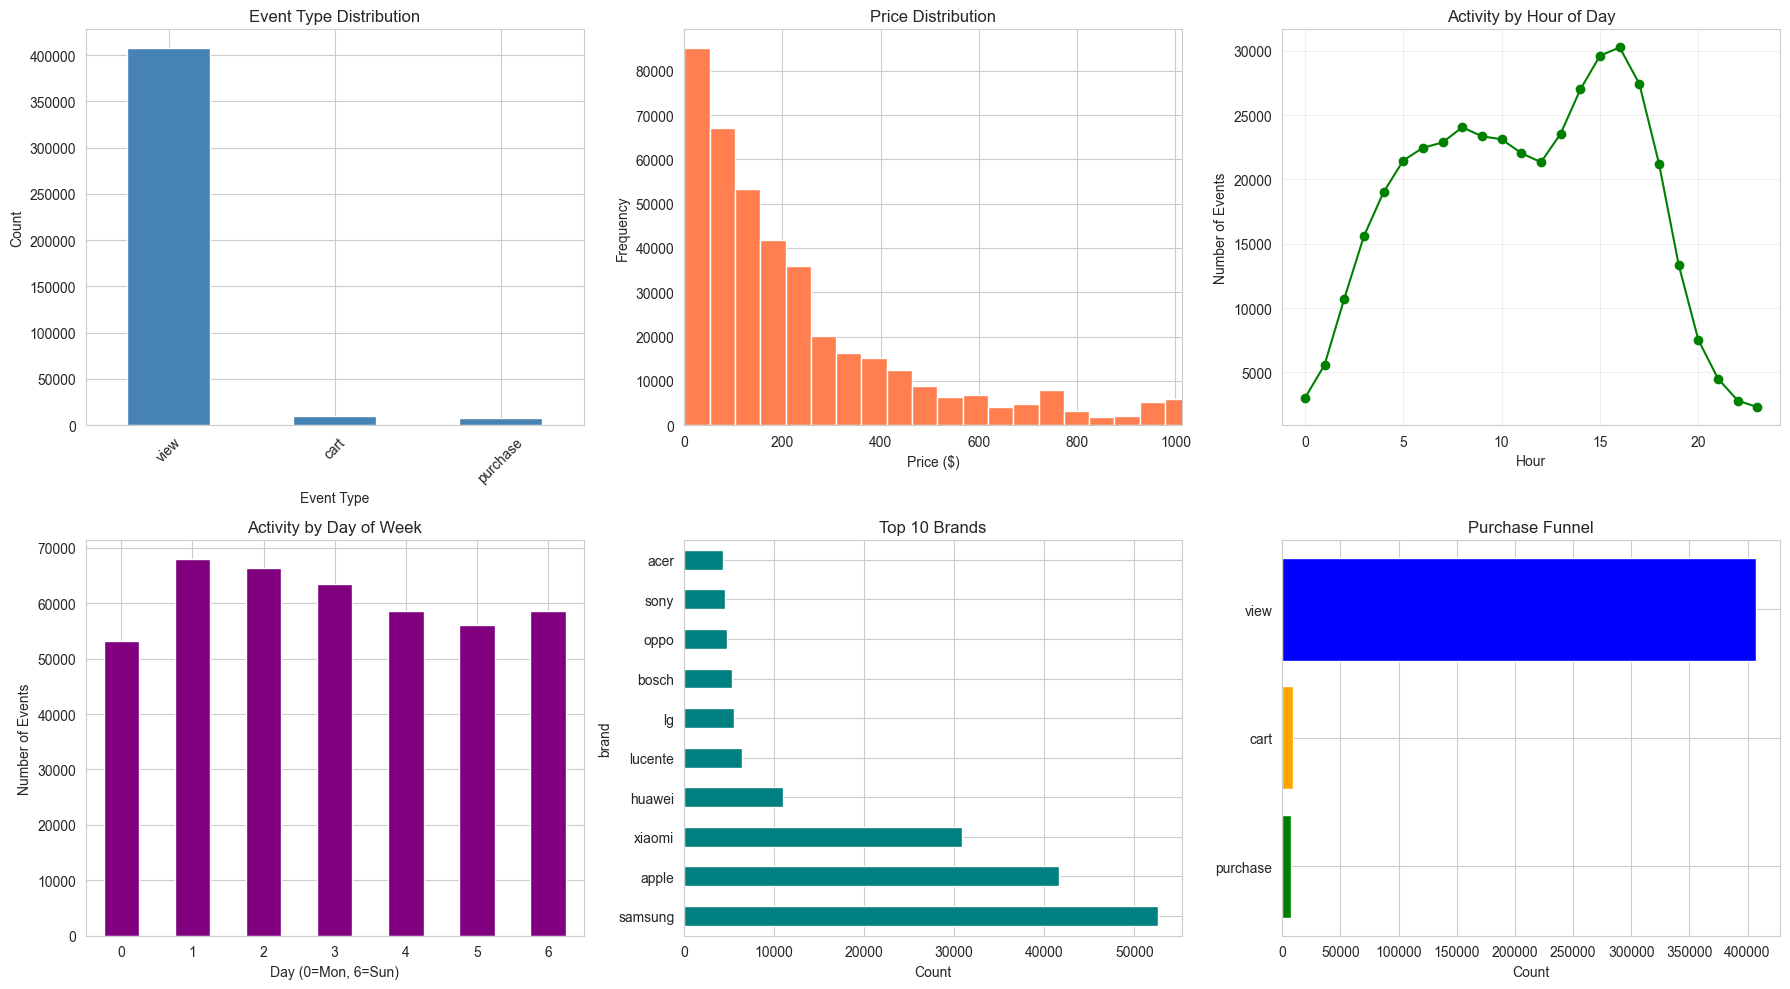


--------------------------------------------------------------------------------
KEY INSIGHTS
--------------------------------------------------------------------------------

Top 10 Categories:
category_code
electronics.smartphone              115148
electronics.clocks                   13155
computers.notebook                   11453
electronics.video.tv                 11165
electronics.audio.headphone          11064
appliances.kitchen.refrigerators      8857
appliances.kitchen.washer             8541
appliances.environment.vacuum         7852
apparel.shoes                         7714
auto.accessories.player               4685
Name: count, dtype: int64

User Engagement Statistics:
  Average events per user: 1.32
  Median events per user: 1
  Max events per user: 85

Purchase Statistics:
  Total purchases: 7,321
  Average purchase price: $315.84
  Median purchase price: $181.21
  Unique buyers: 7,089


In [34]:
# Analyze October 2019 file
df_oct, stats_oct = main_workflow('2019-Oct.csv.gz')

STEP 1: File Structure Inspection
Inspecting: 2019-Nov.csv.gz

Columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

Data types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

First 10 rows:
                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
5  2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   
6  2019-11-01 00:00:01

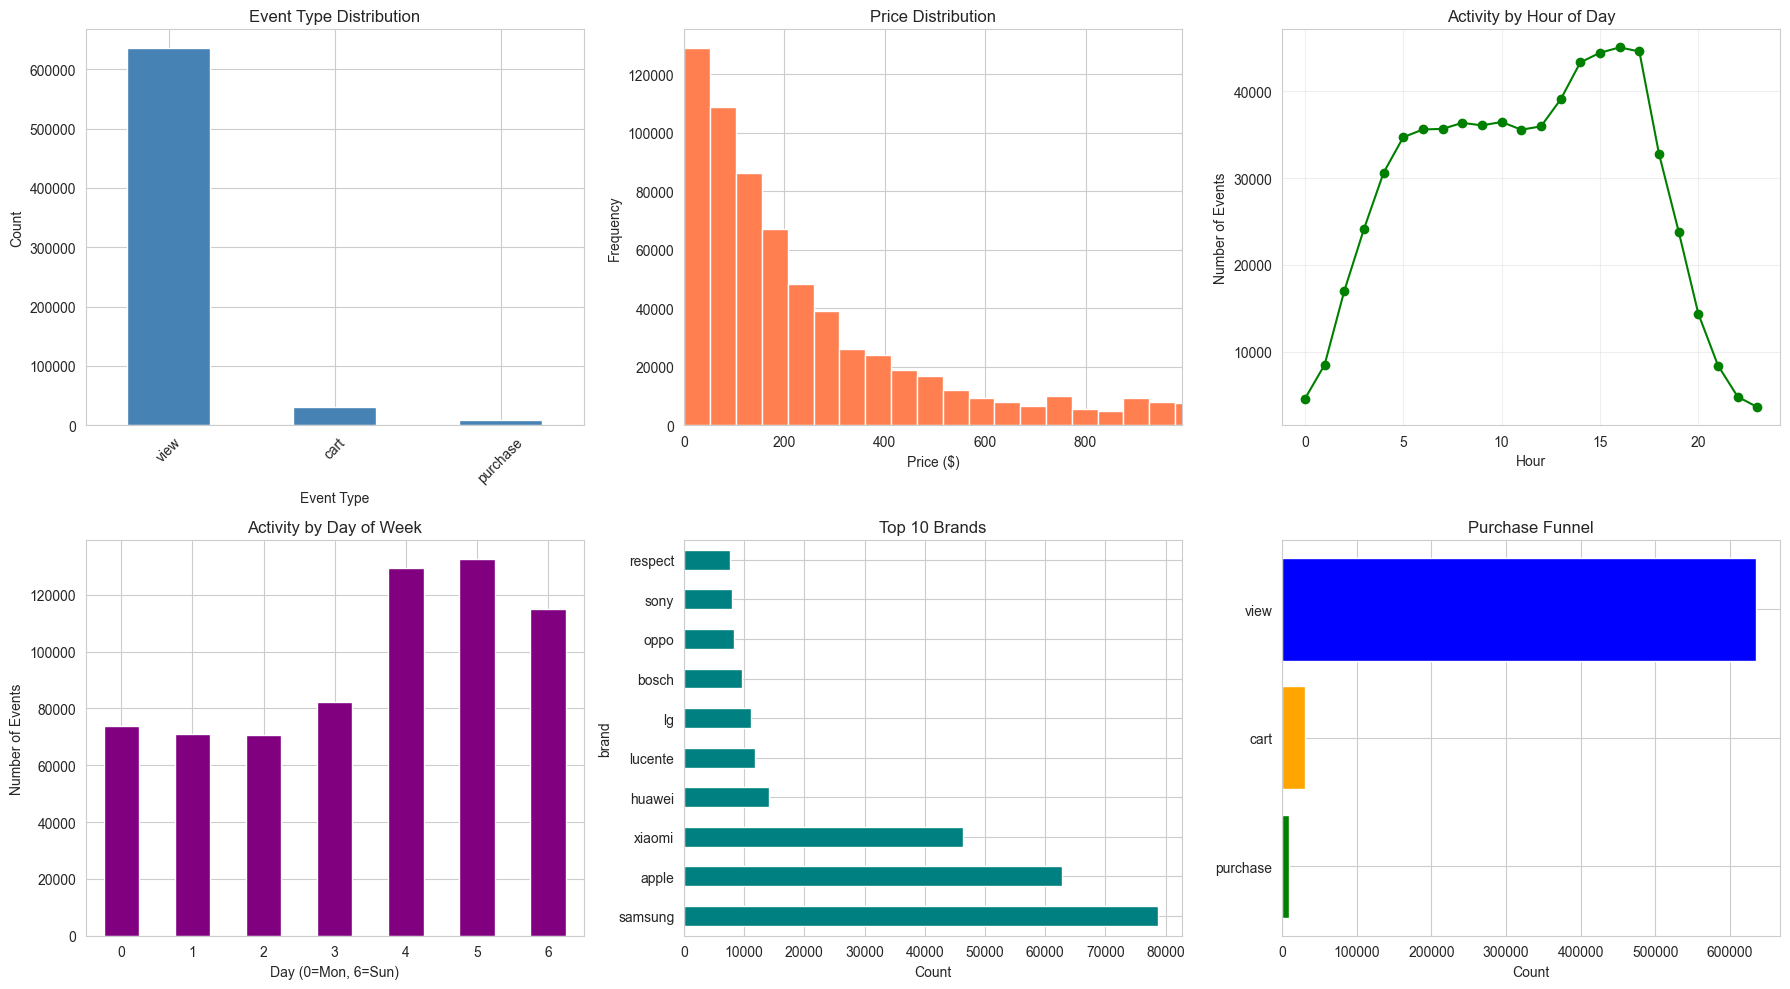


--------------------------------------------------------------------------------
KEY INSIGHTS
--------------------------------------------------------------------------------

Top 10 Categories:
category_code
electronics.smartphone              163914
electronics.video.tv                 22169
computers.notebook                   21862
electronics.clocks                   20913
apparel.shoes                        19142
electronics.audio.headphone          18158
appliances.environment.vacuum        15107
appliances.kitchen.refrigerators     14318
appliances.kitchen.washer            14041
computers.desktop                     6858
Name: count, dtype: int64

User Engagement Statistics:
  Average events per user: 1.42
  Median events per user: 1
  Max events per user: 193

Purchase Statistics:
  Total purchases: 9,264
  Average purchase price: $299.89
  Median purchase price: $170.30
  Unique buyers: 9,012


In [15]:
# Analyze November 2019 data
df_nov, stats_nov = main_workflow('2019-Nov.csv.gz')

STEP 1: File Structure Inspection
Inspecting: 2020-Jan.csv.gz

Columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

Data types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

First 10 rows:
                event_time event_type  product_id          category_id  \
0  2020-01-01 00:00:00 UTC       view     1005073  2232732093077520756   
1  2020-01-01 00:00:01 UTC       view     1005192  2232732093077520756   
2  2020-01-01 00:00:01 UTC       view   100063693  2053013552427434207   
3  2020-01-01 00:00:01 UTC       view     5100816  2232732103831716449   
4  2020-01-01 00:00:02 UTC       view   100014325  2232732103294845523   
5  2020-01-01 00:00:02 UTC       view    16500026  2232732108713886406   
6  2020-01-01 00:00:02

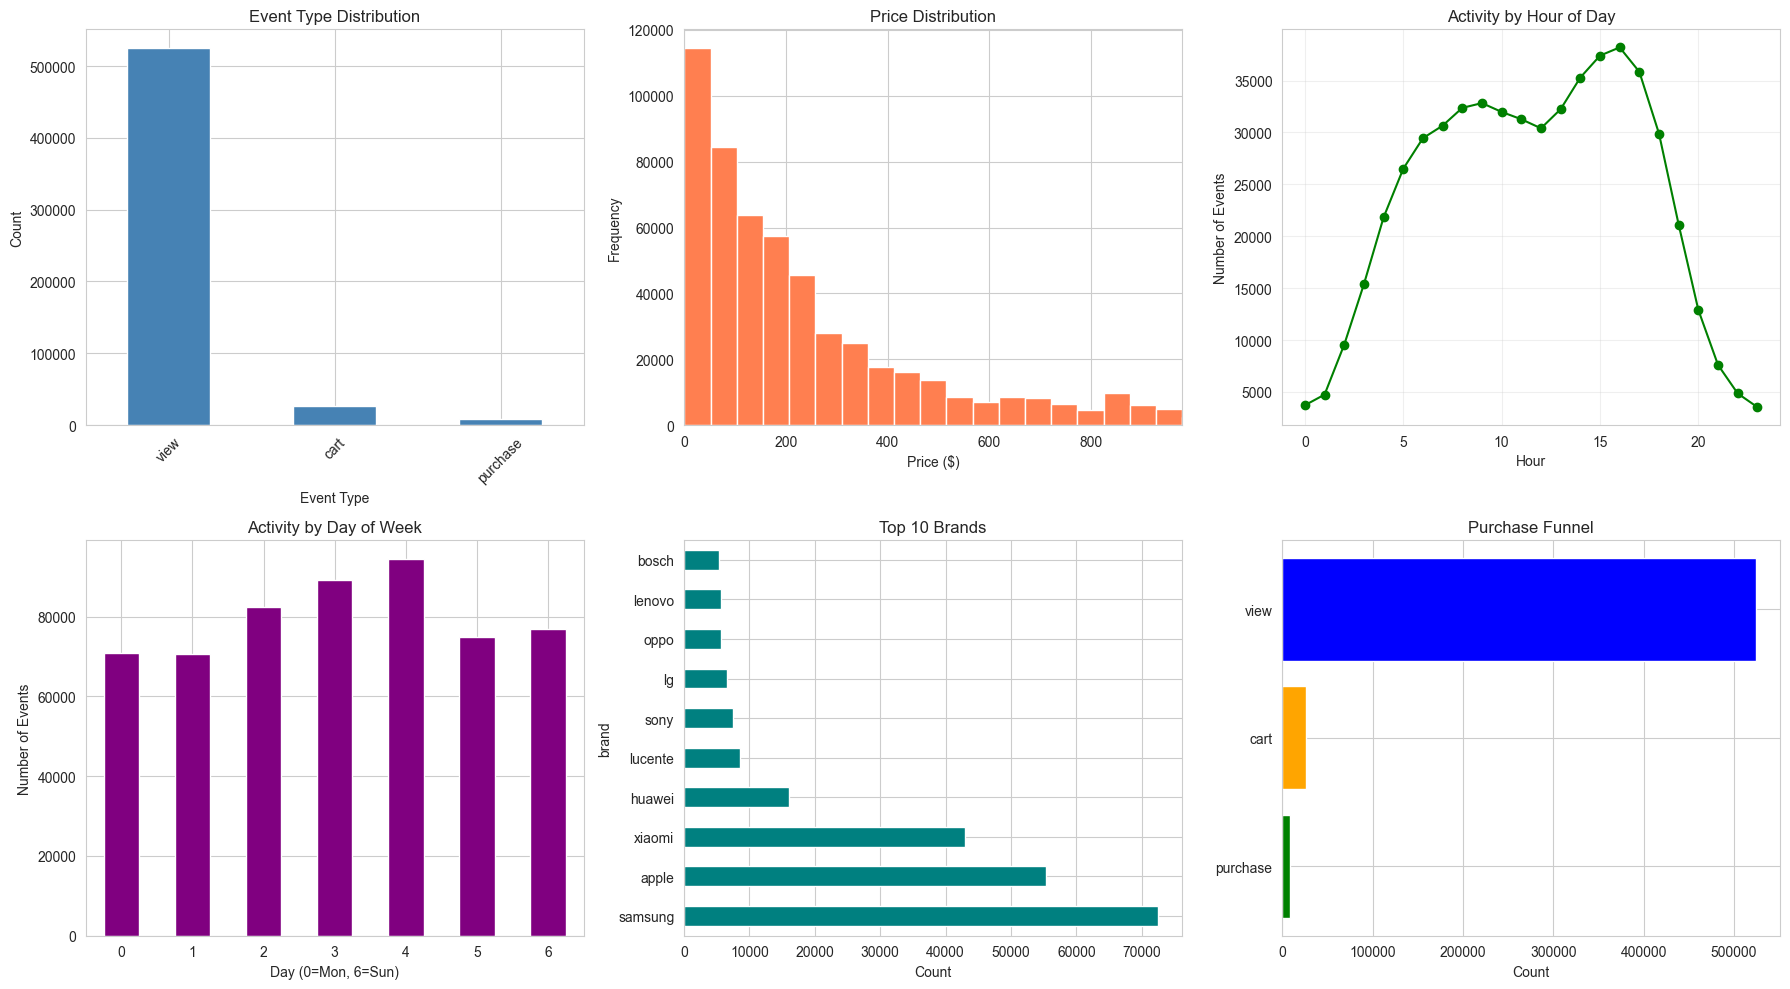


--------------------------------------------------------------------------------
KEY INSIGHTS
--------------------------------------------------------------------------------

Top 10 Categories:
category_code
construction.tools.light            151132
electronics.clocks                   20225
sport.bicycle                        20147
appliances.kitchen.refrigerators     19324
appliances.personal.massager         18851
apparel.shoes                        18660
electronics.audio.headphone          13333
computers.peripherals.printer        11333
appliances.environment.vacuum        10230
appliances.kitchen.washer             8383
Name: count, dtype: int64

User Engagement Statistics:
  Average events per user: 1.35
  Median events per user: 1
  Max events per user: 386

Purchase Statistics:
  Total purchases: 8,353
  Average purchase price: $311.55
  Median purchase price: $180.16
  Unique buyers: 8,034


In [16]:
# Analyze January 2020 data
df_jan, stats_jan = main_workflow('2020-Jan.csv.gz')

### Key Considerations from EDA: ### 

- Purchase rates are low (1.36-1.76%) - need to ensure enough positive examples
- High view-to-purchase ratio - perfect for creating negative examples
- Different traffic patterns across months (Oct: 42M, Nov: 67M, Jan: 56M rows)
- Category shift: Oct/Nov dominated by electronics, Jan shows more construction/tools



### Sampling Approach: ###

- Preserves ALL purchases (positive examples): critical since they're only 1.36-1.76% of data
- Smart negative sampling: samples views to create "didn't purchase" examples
- Balanced representation: keeps more cart events (high intent signals)
- Target sizes: Oct (25K) + Nov (25K) = 50K training | Jan (15K) validation
- User-product pairs: Transforms raw events into ML-ready format


1. Raw samples (3 files): Event logs with all columns preserved
2. User-product pairs (2 files): Ready for model training with:

- Binary labels (purchased: 0/1)
- Interaction features (view_count, cart_count)
- Product features (price, category, brand, popularity)
- User features (total events, purchase history)

## Create dataset samples from raw files ## 

In [24]:
from collections import defaultdict

In [25]:
# Sampling configuration
# Target sizes
TARGET_SIZES = {
    'oct': 25000,   # Oct 2019 - Training set part 1
    'nov': 25000,   # Nov 2019 - Training set part 2
    'jan': 15000    # Jan 2020 - Temporal validation set
}

# Sampling ratios
PURCHASE_SAMPLE_RATE = 1.0      # Keep ALL purchases (they're rare!)
VIEW_SAMPLE_RATE = 0.003        # Sample ~0.3% of views
CART_SAMPLE_RATE = 0.3          # Sample 30% of cart events

In [26]:
# Sampling function
def create_recommendation_sample(filepath, target_size, output_path):
    print(f"\nProcessing: {filepath}")
    print("="*80)
    
    sampled_data = []
    purchase_count = 0
    view_count = 0
    cart_count = 0
    total_processed = 0
    
    # Track unique users and products for diversity
    users_with_purchases = set()
    products_purchased = set()
    
    # First pass: collect purchases and sample others
    print("Pass 1: Collecting purchases and sampling other events...")
    
    chunksize = 500000
    if filepath.endswith('.gz'):
        reader = pd.read_csv(filepath, compression='gzip', chunksize=chunksize)
    else:
        reader = pd.read_csv(filepath, chunksize=chunksize)
    
    for i, chunk in enumerate(reader):
        total_processed += len(chunk)
        
        # Process purchases
        purchases = chunk[chunk['event_type'] == 'purchase'].copy()
        purchase_count += len(purchases)
        sampled_data.append(purchases)
        
        # Track purchase patterns
        users_with_purchases.update(purchases['user_id'].unique())
        products_purchased.update(purchases['product_id'].unique())
        
        # Process carts - sample at higher rate
        carts = chunk[chunk['event_type'] == 'cart']
        cart_sample = carts.sample(frac=CART_SAMPLE_RATE, random_state=42)
        cart_count += len(cart_sample)
        sampled_data.append(cart_sample)
        
        # Process views - sample at lower rate
        views = chunk[chunk['event_type'] == 'view']
        view_sample = views.sample(frac=VIEW_SAMPLE_RATE, random_state=42)
        view_count += len(view_sample)
        sampled_data.append(view_sample)
        
        if (i + 1) % 20 == 0:
            print(f"  Processed {total_processed:,} rows | "
                  f"Purchases: {purchase_count:,} | "
                  f"Carts: {cart_count:,} | "
                  f"Views: {view_count:,}")
    
    # Combine all sampled data
    print("\nCombining sampled data...")
    df_sample = pd.concat(sampled_data, ignore_index=True)
    
    # Shuffle the data
    df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # If target exceeded, trim intelligently
    if len(df_sample) > target_size:
        print(f"\nTrimming from {len(df_sample):,} to {target_size:,} rows...")
        
        # Keep all purchases, sample the rest
        purchases_df = df_sample[df_sample['event_type'] == 'purchase']
        others_df = df_sample[df_sample['event_type'] != 'purchase']
        
        # Check if room for other events
        if len(purchases_df) >= target_size:
            print(f"  Warning: {len(purchases_df):,} purchases exceed target of {target_size:,}")
            print(f"  Keeping all data ({len(df_sample):,} rows) to preserve purchases")
        else:
            remaining_size = target_size - len(purchases_df)
            if remaining_size > len(others_df):
                # Not enough others to sample, keep all
                print(f"  Keeping all {len(df_sample):,} rows")
            else:
                others_sample = others_df.sample(n=remaining_size, random_state=42)
                df_sample = pd.concat([purchases_df, others_sample], ignore_index=True)
                df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Print final statistics
    print("\n" + "="*80)
    print("SAMPLE STATISTICS")
    print("="*80)
    print(f"Total rows: {len(df_sample):,}")
    print(f"\nEvent type distribution:")
    print(df_sample['event_type'].value_counts())
    print(f"\nPurchase rate: {(df_sample['event_type'] == 'purchase').sum() / len(df_sample) * 100:.2f}%")
    print(f"Unique users: {df_sample['user_id'].nunique():,}")
    print(f"Unique products: {df_sample['product_id'].nunique():,}")
    print(f"Users with purchases: {len(users_with_purchases):,}")
    print(f"Products purchased: {len(products_purchased):,}")
    
    # Save to CSV
    print(f"\nSaving to {output_path}...")
    df_sample.to_csv(output_path, index=False)
    print(f"Saved! File size: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df_sample

In [27]:
# User-product pair creation
def create_user_product_pairs(df, label_name='purchased'):
    """
    Transform event log into user-product pairs with labels
    Output: Each row = (user_id, product_id, features, purchased: 0/1)
    """
    
    print("\nCreating user-product pairs with labels...")
    print("="*80)
    
    # Group by user and product
    user_product_groups = df.groupby(['user_id', 'product_id'])
    
    records = []
    
    for (user_id, product_id), group in user_product_groups:
        # Label: 1 if user purchased this product, 0 otherwise
        purchased = 1 if (group['event_type'] == 'purchase').any() else 0
        
        # Basic features from the group
        features = {
            'user_id': user_id,
            'product_id': product_id,
            'purchased': purchased,
            
            # Interaction features
            'view_count': (group['event_type'] == 'view').sum(),
            'cart_count': (group['event_type'] == 'cart').sum(),
            'total_interactions': len(group),
            
            # Product features (take first occurrence)
            'price': group['price'].iloc[0],
            'category_id': group['category_id'].iloc[0],
            'category_code': group['category_code'].iloc[0],
            'brand': group['brand'].iloc[0],
            
            # Temporal features
            'first_interaction': group['event_time'].iloc[0],
            'last_interaction': group['event_time'].iloc[-1],
        }
        
        records.append(features)
    
    # Create dataframe
    df_pairs = pd.DataFrame(records)
    
    # Add product popularity features
    print("\nAdding product popularity features...")
    product_stats = df.groupby('product_id').agg({
        'user_id': 'count',  # total views
        'event_type': lambda x: (x == 'purchase').sum()  # total purchases
    }).rename(columns={'user_id': 'product_view_count', 'event_type': 'product_purchase_count'})
    
    df_pairs = df_pairs.merge(product_stats, on='product_id', how='left')
    df_pairs['product_conversion_rate'] = (
        df_pairs['product_purchase_count'] / df_pairs['product_view_count']
    ).fillna(0)
    
    # Add user activity features
    print("Adding user activity features...")
    user_stats = df.groupby('user_id').agg({
        'product_id': 'count',  # total user events
        'event_type': lambda x: (x == 'purchase').sum()  # user purchases
    }).rename(columns={'product_id': 'user_total_events', 'event_type': 'user_total_purchases'})
    
    df_pairs = df_pairs.merge(user_stats, on='user_id', how='left')
    
    # Print statistics
    print("\n" + "="*80)
    print("USER-PRODUCT PAIRS STATISTICS")
    print("="*80)
    print(f"Total pairs: {len(df_pairs):,}")
    print(f"Positive examples (purchased): {df_pairs['purchased'].sum():,} ({df_pairs['purchased'].mean()*100:.2f}%)")
    print(f"Negative examples (not purchased): {(df_pairs['purchased']==0).sum():,} ({(1-df_pairs['purchased'].mean())*100:.2f}%)")
    print(f"\nFeatures created: {df_pairs.shape[1]}")
    print(f"Columns: {df_pairs.columns.tolist()}")
    
    return df_pairs

In [28]:
# main workflow function
def create_all_datasets():
    print("\n" + "="*80)
    print("CREATING RECOMMENDATION SYSTEM DATASETS")
    print("="*80)
    
    # Create samples from raw data
    print("\n\n### STEP 1: Creating raw event samples ###\n")
    
    df_oct = create_recommendation_sample(
        '2019-Oct.csv.gz',
        TARGET_SIZES['oct'],
        'oct_2019_sample.csv'
    )
    
    df_nov = create_recommendation_sample(
        '2019-Nov.csv.gz',
        TARGET_SIZES['nov'],
        'nov_2019_sample.csv'
    )
    
    df_jan = create_recommendation_sample(
        '2020-Jan.csv.gz',
        TARGET_SIZES['jan'],
        'jan_2020_sample.csv'
    )
    
    # Create user-product pairs
    print("\n\n### STEP 2: Creating user-product pairs for modeling ###\n")
    
    # Combine Oct + Nov for training
    df_train = pd.concat([df_oct, df_nov], ignore_index=True)
    df_train_pairs = create_user_product_pairs(df_train, label_name='purchased')
    df_train_pairs.to_csv('train_user_product_pairs.csv', index=False)
    print(f"\nTraining pairs saved to 'train_user_product_pairs.csv'")
    
    # Jan for validation
    df_val_pairs = create_user_product_pairs(df_jan, label_name='purchased')
    df_val_pairs.to_csv('validation_user_product_pairs.csv', index=False)
    print(f"Validation pairs saved to 'validation_user_product_pairs.csv'")
    
    # Summary
    print("\n\n" + "="*80)
    print("DATASET CREATION COMPLETE!")
    print("="*80)
    print("\nFiles created:")
    print("1. oct_2019_sample.csv - Raw Oct events")
    print("2. nov_2019_sample.csv - Raw Nov events")
    print("3. jan_2020_sample.csv - Raw Jan events")
    print("4. train_user_product_pairs.csv - Training data (Oct+Nov user-product pairs)")
    print("5. validation_user_product_pairs.csv - Validation data (Jan user-product pairs)")
    
    return df_train_pairs, df_val_pairs

In [29]:
# Execute
if __name__ == "__main__":
    # Run the complete workflow
    train_pairs, val_pairs = create_all_datasets()
    
    # Display sample of training data
    print("\n\nSample of training data:")
    print(train_pairs.head(10))


CREATING RECOMMENDATION SYSTEM DATASETS


### STEP 1: Creating raw event samples ###


Processing: 2019-Oct.csv.gz
Pass 1: Collecting purchases and sampling other events...
  Processed 10,000,000 rows | Purchases: 172,826 | Carts: 59,806 | Views: 28,884
  Processed 20,000,000 rows | Purchases: 349,700 | Carts: 117,136 | Views: 57,781
  Processed 30,000,000 rows | Purchases: 533,341 | Carts: 199,980 | Views: 86,400
  Processed 40,000,000 rows | Purchases: 701,979 | Carts: 267,833 | Views: 115,214

Combining sampled data...

Trimming from 1,143,144 to 25,000 rows...
  Keeping all data (1,143,144 rows) to preserve purchases

SAMPLE STATISTICS
Total rows: 1,143,144

Event type distribution:
event_type
purchase    742849
cart        277958
view        122337
Name: count, dtype: int64

Purchase rate: 64.98%
Unique users: 475,531
Unique products: 53,704
Users with purchases: 347,118
Products purchased: 42,241

Saving to oct_2019_sample.csv...
Saved! File size: 393.63 MB

Processing: 2019-Nov

## Data Preprocessing ## 

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load data
def load_data(train_path='train_user_product_pairs.csv', 
              val_path='validation_user_product_pairs.csv'):
    print("LOADING DATA")
    
    print(f"\nLoading training data from {train_path}...")
    df_train = pd.read_csv(train_path)
    print(f"Training data shape: {df_train.shape}")
    
    print(f"\nLoading validation data from {val_path}...")
    df_val = pd.read_csv(val_path)
    print(f"Validation data shape: {df_val.shape}")
    
    # Display basic info
    print(f"\n--- Training Data Info ---")
    print(f"Columns: {df_train.columns.tolist()}")
    print(f"\nFirst few rows:")
    print(df_train.head())
    
    print(f"\nData types:")
    print(df_train.dtypes)
    
    print(f"\nMissing values:")
    print(df_train.isnull().sum())
    
    print(f"\nTarget distribution:")
    print(df_train['purchased'].value_counts())
    print(f"Purchase rate: {df_train['purchased'].mean()*100:.2f}%")
    
    return df_train, df_val

In [35]:
# Function for handling missing values in categorical columns
def handle_missing_values(df_train, df_val):
    print("HANDLING MISSING VALUES")
    
    # Make copies to avoid modifying originals
    df_train = df_train.copy()
    df_val = df_val.copy()
    
    # Identify columns with missing values
    print("\nMissing values before handling:")
    print("Training set:")
    print(df_train.isnull().sum()[df_train.isnull().sum() > 0])
    print("\nValidation set:")
    print(df_val.isnull().sum()[df_val.isnull().sum() > 0])
    
    # Fill categorical missing values
    categorical_cols = ['category_code', 'brand']
    
    for col in categorical_cols:
        if col in df_train.columns:
            # Count missing before
            train_missing = df_train[col].isnull().sum()
            val_missing = df_val[col].isnull().sum()
            
            # Fill with 'unknown'
            df_train[col] = df_train[col].fillna('unknown')
            df_val[col] = df_val[col].fillna('unknown')
            
            print(f"\n{col}:")
            print(f"  Training: Filled {train_missing} missing values ({train_missing/len(df_train)*100:.2f}%)")
            print(f"  Validation: Filled {val_missing} missing values ({val_missing/len(df_val)*100:.2f}%)")
    
    # Handle any remaining missing values in numeric columns
    numeric_cols = df_train.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        if df_train[col].isnull().sum() > 0:
            # Fill with median
            median_value = df_train[col].median()
            df_train[col] = df_train[col].fillna(median_value)
            df_val[col] = df_val[col].fillna(median_value)
            print(f"\n{col}: Filled with median value {median_value:.2f}")
    
    print("\n✓ Missing values handled!")
    print("\nMissing values after handling:")
    print(f"Training: {df_train.isnull().sum().sum()} total missing values")
    print(f"Validation: {df_val.isnull().sum().sum()} total missing values")
    
    return df_train, df_val

In [36]:
# Function for encoding categorical values
def encode_categorical_features(df_train, df_val, method='label'):

    print(f"ENCODING CATEGORICAL FEATURES (Method: {method})")
    
    df_train = df_train.copy()
    df_val = df_val.copy()
    
    categorical_cols = ['category_code', 'brand']
    
    if method == 'label':
        # Label Encoding
        print("\nUsing Label Encoding (each unique category gets a number)")
        
        label_encoders = {}
        
        for col in categorical_cols:
            if col in df_train.columns:
                print(f"\n{col}:")
                print(f"  Unique values in training: {df_train[col].nunique()}")
                
                # Initialize encoder
                le = LabelEncoder()
                
                # Fit on training data
                le.fit(df_train[col])
                
                # Transform both train and val
                df_train[col + '_encoded'] = le.transform(df_train[col])
                
                # Handle unseen categories in validation
                df_val[col + '_encoded'] = df_val[col].apply(
                    lambda x: le.transform([x])[0] if x in le.classes_ else -1
                )
                
                # Store encoder for later use
                label_encoders[col] = le
                
                print(f"  Encoded range: {df_train[col + '_encoded'].min()} to {df_train[col + '_encoded'].max()}")
                print(f"  Unseen categories in validation: {(df_val[col + '_encoded'] == -1).sum()}")
        
        print("\n✓ Label encoding complete!")
        return df_train, df_val, label_encoders
    
    elif method == 'onehot':
        # One-Hot Encoding
        print("\nUsing One-Hot Encoding (each category becomes a binary column)")
        print("Good for: Linear models, logistic regression")
        
        # Check cardinality first
        for col in categorical_cols:
            if col in df_train.columns:
                n_unique = df_train[col].nunique()
                print(f"\n{col}: {n_unique} unique values")
                if n_unique > 50:
                    print(f"  WARNING: High cardinality ({n_unique} categories) will create many columns!")
        
        # Perform one-hot encoding
        df_train_encoded = pd.get_dummies(
            df_train, 
            columns=categorical_cols,
            prefix=categorical_cols,
            drop_first=True  # Drop first category to avoid multicollinearity
        )
        
        df_val_encoded = pd.get_dummies(
            df_val,
            columns=categorical_cols,
            prefix=categorical_cols,
            drop_first=True
        )
        
        # Align columns (validation might have different categories)
        # Add missing columns to validation set
        missing_cols = set(df_train_encoded.columns) - set(df_val_encoded.columns)
        for col in missing_cols:
            df_val_encoded[col] = 0
        
        # Remove extra columns from validation set
        extra_cols = set(df_val_encoded.columns) - set(df_train_encoded.columns)
        df_val_encoded = df_val_encoded.drop(columns=extra_cols)
        
        # Ensure same column order
        df_val_encoded = df_val_encoded[df_train_encoded.columns]
        
        print(f"\n✓ One-hot encoding complete!")
        print(f"Training shape: {df_train_encoded.shape}")
        print(f"Validation shape: {df_val_encoded.shape}")
        print(f"New columns created: {df_train_encoded.shape[1] - df_train.shape[1]}")
        
        return df_train_encoded, df_val_encoded, None

In [37]:
# Feature selection
def prepare_features_for_modeling(df_train, df_val, encoding_method='label'):
    print("\n" + "="*80)
    print("PREPARING FEATURES FOR MODELING")
    
    df_train = df_train.copy()
    df_val = df_val.copy()
    
    # Define feature columns based on encoding method
    if encoding_method == 'label':
        # Drop original categorical columns, keep encoded versions
        feature_cols = [
            # Interaction features
            'view_count', 'cart_count', 'total_interactions',
            
            # Product features
            'price', 'category_id', 'category_code_encoded', 'brand_encoded',
            'product_view_count', 'product_purchase_count', 'product_conversion_rate',
            
            # User features
            'user_total_events', 'user_total_purchases'
        ]
    else:
        # For one-hot encoding, automatically select all columns except identifiers and target
        exclude_cols = ['user_id', 'product_id', 'purchased', 'first_interaction', 
                       'last_interaction', 'category_code', 'brand', 'category_id']
        feature_cols = [col for col in df_train.columns if col not in exclude_cols]
    
    # Check if all feature columns exist
    missing_features = [col for col in feature_cols if col not in df_train.columns]
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        feature_cols = [col for col in feature_cols if col in df_train.columns]
    
    print(f"\nSelected features ({len(feature_cols)}):")
    for i, col in enumerate(feature_cols, 1):
        print(f"  {i}. {col}")
    
    # Extract features and target
    X_train = df_train[feature_cols]
    y_train = df_train['purchased']
    
    X_val = df_val[feature_cols]
    y_val = df_val['purchased']
    
    print(f"\nFinal shapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  y_train: {y_train.shape}")
    print(f"  X_val: {X_val.shape}")
    print(f"  y_val: {y_val.shape}")
    
    print(f"\nClass distribution:")
    print(f"  Training - Positive: {y_train.sum()} ({y_train.mean()*100:.2f}%), Negative: {(~y_train.astype(bool)).sum()} ({(1-y_train.mean())*100:.2f}%)")
    print(f"  Validation - Positive: {y_val.sum()} ({y_val.mean()*100:.2f}%), Negative: {(~y_val.astype(bool)).sum()} ({(1-y_val.mean())*100:.2f}%)")
    
    # Check for any remaining issues
    print(f"\nData quality check:")
    print(f"  Missing values in X_train: {X_train.isnull().sum().sum()}")
    print(f"  Missing values in X_val: {X_val.isnull().sum().sum()}")
    print(f"  Infinite values in X_train: {np.isinf(X_train.values).sum()}")
    print(f"  Infinite values in X_val: {np.isinf(X_val.values).sum()}")
    
    return X_train, y_train, X_val, y_val, feature_cols

In [38]:
# Function for EDA on processed data
def visualize_processed_features(X_train, y_train, feature_cols):
    print("\n" + "="*80)
    print("FEATURE VISUALIZATION")
    
    # Combine for visualization
    df_viz = X_train.copy()
    df_viz['purchased'] = y_train.values
    
    # Select numeric features for visualization
    numeric_features = df_viz.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features.remove('purchased')
    numeric_features = numeric_features[:8]  # Limit to 8 for visualization
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_features):
        if idx < 8:
            # Box plot by purchase status
            df_viz.boxplot(column=col, by='purchased', ax=axes[idx])
            axes[idx].set_title(f'{col} by Purchase Status')
            axes[idx].set_xlabel('Purchased (0=No, 1=Yes)')
            axes[idx].set_ylabel(col)
            plt.sca(axes[idx])
            plt.xticks([1, 2], ['No', 'Yes'])
    
    plt.tight_layout()
    plt.show()
    
    # Feature correlation with target
    print("\nFeature correlation with 'purchased' (top 10):")
    correlations = df_viz[numeric_features + ['purchased']].corr()['purchased'].sort_values(ascending=False)
    print(correlations[1:11])  # Exclude 'purchased' itself

In [39]:
# Preprocessing workflow
def main_preprocessing_workflow(encoding_method='label'):
    print("\n" + "="*80)
    print("DATA PREPROCESSING PIPELINE")
    print("="*80)
    print(f"Encoding method: {encoding_method.upper()}")
    
    # Step 1: Load data
    df_train, df_val = load_data()
    
    # Step 2: Handle missing values
    df_train, df_val = handle_missing_values(df_train, df_val)
    
    # Step 3: Encode categorical features
    df_train, df_val, encoders = encode_categorical_features(
        df_train, df_val, method=encoding_method
    )
    
    # Step 4: Prepare features for modeling
    X_train, y_train, X_val, y_val, feature_cols = prepare_features_for_modeling(
        df_train, df_val, encoding_method=encoding_method
    )
    
    # Step 5: Visualize features
    visualize_processed_features(X_train, y_train, feature_cols)
    
    print("PREPROCESSING COMPLETE!")
    print("\nReady for model training!")
    
    return X_train, y_train, X_val, y_val, feature_cols, encoders

In [ ]:
# execute
if __name__ == "__main__":
    # Run preprocessing with label encoding
    X_train, y_train, X_val, y_val, features, encoders = main_preprocessing_workflow(
        encoding_method='label'
    )
    
    # Display final data summary
    print("\n\nFinal preprocessed data:")
    print(f"X_train shape: {X_train.shape}")
    print(f"Features: {features}")
    print(f"\nReady for model training!")


DATA PREPROCESSING PIPELINE
Encoding method: LABEL
LOADING DATA

Loading training data from train_user_product_pairs.csv...
Training data shape: (2018753, 17)

Loading validation data from validation_user_product_pairs.csv...
Validation data shape: (1062101, 17)

--- Training Data Info ---
Columns: ['user_id', 'product_id', 'purchased', 'view_count', 'cart_count', 'total_interactions', 'price', 'category_id', 'category_code', 'brand', 'first_interaction', 'last_interaction', 'product_view_count', 'product_purchase_count', 'product_conversion_rate', 'user_total_events', 'user_total_purchases']

First few rows:
     user_id  product_id  purchased  view_count  cart_count  \
0  107837897     4700557          0           0           1   
1  122966408    32801147          0           1           0   
2  125917727    30100067          0           0           1   
3  138340325    17301041          1           0           0   
4  154128341    11700129          0           0           1   

   